In [1]:
import os
import glob
import nibabel as nib
import numpy as np
import cv2
import math

import matplotlib.pyplot as plt

In [2]:
data_path = '../data/training/'
os.listdir(data_path)

['vs_gk_8',
 'vs_gk_1',
 'vs_gk_6',
 'vs_gk_7',
 'vs_gk_9',
 '.DS_Store',
 'vs_gk_87',
 'vs_gk_27',
 'vs_gk_20',
 'vs_gk_29',
 'vs_gk_16',
 'vs_gk_11',
 'vs_gk_10',
 'vs_gk_28',
 'vs_gk_17',
 'vs_gk_21',
 'vs_gk_19',
 'vs_gk_26',
 'vs_gk_5',
 'vs_gk_2',
 'vs_gk_3',
 'vs_gk_4',
 'vs_gk_30',
 'vs_gk_23',
 'vs_gk_24',
 'vs_gk_12',
 'vs_gk_15',
 'vs_gk_14',
 'vs_gk_13',
 'vs_gk_25',
 'vs_gk_22']

In [67]:
scan_path = os.path.join(data_path, 'vs_gk_11')

t1_path = glob.glob(os.path.join(scan_path, '*_t1_*'))[0]
t2_path = glob.glob(os.path.join(scan_path, '*_t2_*'))[0]
seg_path = glob.glob(os.path.join(scan_path, '*_seg_*'))[0]
print(t1_path)

../data/training/vs_gk_11/vs_gk_t1_refT2.nii.gz


In [68]:
t1 = nib.load(t1_path).get_fdata()
t2 = nib.load(t2_path).get_fdata()
seg = nib.load(seg_path).get_fdata()

In [69]:
def get_glioma_indices(mask):
  first = np.nonzero((mask == 1))[:,1][0].item()
  last = np.nonzero((mask == 1))[:,1][-1].item()

  return first, last

In [70]:
# first, last = get_glioma_indices(seg)

In [71]:
seg.shape

(448, 448, 80)

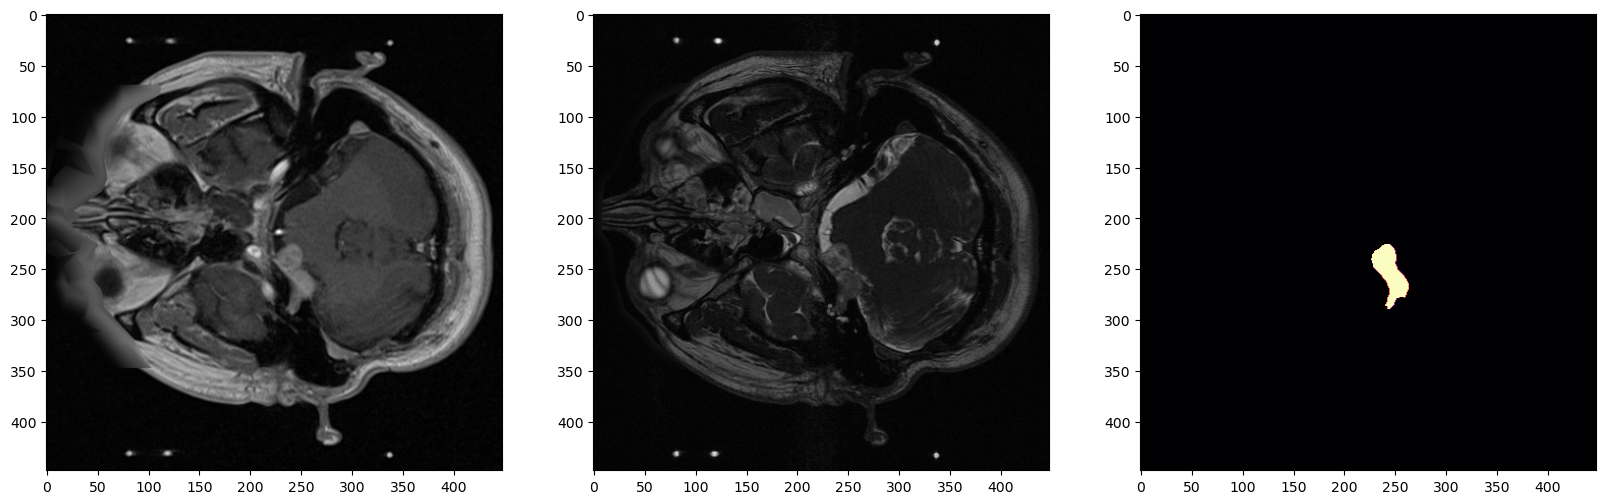

In [75]:
slice = 1
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1[:,:,slice], cmap = 'gray')
ax2.imshow(t2[:,:,slice], cmap = 'gray')
ax3.imshow(seg[:,:,slice], cmap='magma')
plt.show()

In [98]:
import plotly.express as px
import json

In [102]:
with open('../training_outputs/train_history.json', 'r') as f:
    train_history = json.load(f)
with open('../training_outputs/val_history.json', 'r') as f:
    val_history = json.load(f)

In [103]:
fig = px.line({'loss': train_history['loss'], 'val_loss': val_history['loss']})
fig.show()

In [104]:
fig = px.line({'dice': train_history['dice'], 'val_dice': val_history['dice']})
fig.show()